In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
# visualizer.py
import plotly.graph_objects as go
warnings.filterwarnings('ignore') # 경고 메시지 무시
# pd.set_option('display.max_columns',None) # 모든 열을 출력

In [2]:
import matplotlib.font_manager as font_manager
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
from sqlalchemy import create_engine

# 데이터베이스 연결 설정
username = 'dbmasteruser'  # MySQL 사용자 이름
password = 'MoonYang0710*'  # MySQL 비밀번호
host = 'ls-ffe9b51d9f7dcfeacb3d8d12c9e1b5806ab9a156.cze44iokmoyf.ap-northeast-2.rds.amazonaws.com' # MySQL 호스트, 예: localhost 또는 IP 주소
port = '3306'          # MySQL 포트, 기본값은 3306
database = 'WeatherDB'  # 사용할 데이터베이스 이름

# SQLAlchemy 엔진 생성
# 예: 'mysql+pymysql://<username>:<password>@<host>:<port>/<database>'
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

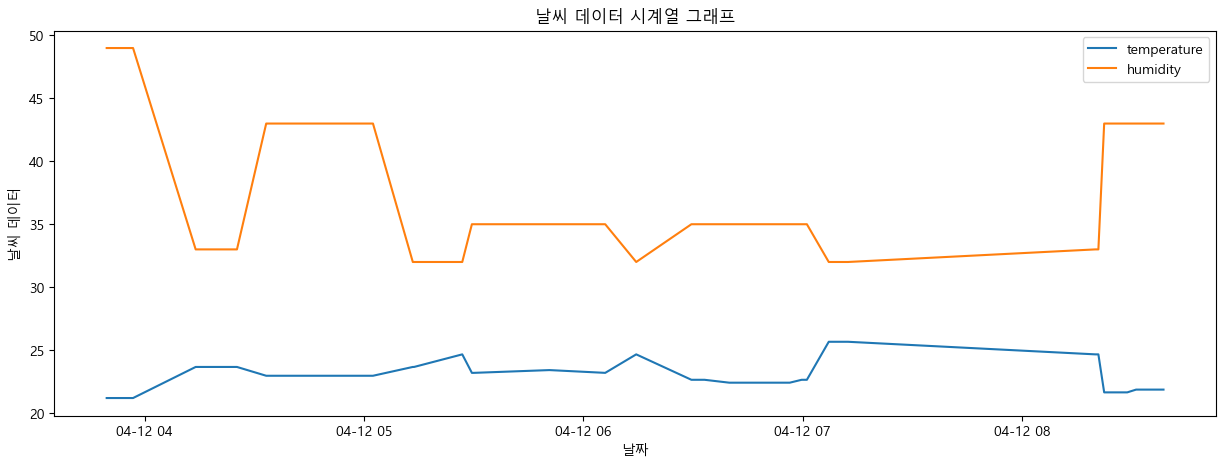

In [4]:
# weather_data데이터베이스의 테이블 데이터베이스 가져와서 df 변수에 저장
df = pd.read_sql_table('weather_data', engine)
df.head()

# df데이터를 plotly로 시계열 그래프로 출력
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['recorded_at'], y=df['temperature'], mode='lines', name='temperature'))
fig.add_trace(go.Scatter(x=df['recorded_at'], y=df['humidity'], mode='lines', name='humidity'))

fig.update_layout(title='날씨 데이터 시계열 그래프', xaxis_title='날짜', yaxis_title='날씨 데이터')

# matplotlib로 시계열 그래프 출력
plt.figure(figsize=(15, 5))
plt.plot(df['recorded_at'], df['temperature'], label='temperature')
plt.plot(df['recorded_at'], df['humidity'], label='humidity')
plt.title('날씨 데이터 시계열 그래프')
plt.xlabel('날짜')
plt.ylabel('날씨 데이터')
plt.legend()
plt.show()

In [5]:
import requests
import sqlalchemy
from sqlalchemy import create_engine, Table, MetaData
from sqlalchemy.sql import select

# OpenWeatherMap API URL 및 키
# 요청할 도시
city = "Seoul"
api_key = "df88e0a6830e02ff47ddc3c8531f3bfd"

api_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"

# API 요청
response = requests.get(api_url)

# 응답을 JSON으로 변환
data = response.json()

# 데이터베이스 연결 설정
username = 'dbmasteruser'  # MySQL 사용자 이름
password = 'MoonYang0710*'  # MySQL 비밀번호
host = 'ls-ffe9b51d9f7dcfeacb3d8d12c9e1b5806ab9a156.cze44iokmoyf.ap-northeast-2.rds.amazonaws.com' # MySQL 호스트, 예: localhost 또는 IP 주소
port = '3306'          # MySQL 포트, 기본값은 3306
database = 'python_db'  # 사용할 데이터베이스 이름

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')




> 예시

In [6]:
# data_fetcher.py
import requests

class DataFetcher:
    def __init__(self):
        pass
        
    def fetch_weather_data(self, city):
        api_key = "df88e0a6830e02ff47ddc3c8531f3bfd"
        api_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
        response = requests.get(api_url)
        if response.status_code == 200:
            data = response.json()
            return data
        else:
            return None
        
# data_processor.py
class DataProcessor:
    def process_data(self):
		    ## TO-DO ##
		    ## API를 통해 입력받은 json중에서 필요한 field값만 추출하기
        return processed_data
    

class Visualizer:
    def plot_data(self, data, output_file='output.png'):
        #temperatures = [entry['temperature'] for entry in data]
        temperatures = []
        fig = go.Figure()
        fig.add_trace(go.Scatter(y=temperatures, mode='lines+markers', name='Temperature'))
        
        fig.update_layout(title=f'{data[0]["name"]}: Temperature Over Time(24h)',
                          xaxis_title='Time',
                          yaxis_title='Temperature (°C)',
                          template='plotly_dark')

        fig.write_image(output_file)
        print(f"Graph saved to {output_file}")

> test

In [ ]:
# `data_fetcher`: API에서 데이터를 가져오는 기능을 담당합니다.
# `data_processor`: 가져온 데이터를 처리해서 visualizer로 넘겨주는 역할을 합니다.
# `visualizer`: 데이터를 그래프 형태로 시각화하고 이a미지 파일로 저장합니다.

> 1단계: 데이터 가져오기
- API를 사용하여 날씨 데이터를 가져오는 DataFetcher 클래스를 구현합니다. 
- 이 클래스는 requests 모듈을 사용하여 외부 API에서 데이터를 요청하고 받아옵니다.

In [14]:
# data_fetcher.py
import requests

class DataFetcher:
    def __init__(self, api_key):
        self.api_key = api_key
        self.api_url = "http://api.openweathermap.org/data/2.5/weather"

    def fetch_weather_data(self, city):
        params = {
            'q': city,
            'appid': self.api_key,
            'units': 'metric'
        }
        response = requests.get(self.api_url, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            return None

> 2단계: 데이터베이스 작업
- MySQL 데이터베이스에 연결하고 데이터를 삽입하는 Database 클래스를 구현합니다. 
- 이 클래스는 데이터베이스 연결 및 데이터 삽입, 조회 기능을 담당합니다.

In [15]:
# database.py
from sqlalchemy import create_engine, Table, Column, Float, String, MetaData, DateTime

class Database:
    def __init__(self, username, password, host, port, database):
        self.engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')
        self.metadata = MetaData()
        self.weather = Table('weather', self.metadata,
                             Column('city', String(50), nullable=False),
                             Column('temperature', Float, nullable=False),
                             Column('weather_description', String(255), nullable=False),
                             Column('recorded_time', DateTime, nullable=False))

        self.metadata.create_all(self.engine)

    def insert_weather_data(self, weather_data):
        insert_query = self.weather.insert().values(
            city=weather_data['name'],
            temperature=weather_data['main']['temp'],
            weather_description=weather_data['weather'][0]['description'],
            recorded_time=datetime.fromtimestamp(weather_data['dt'])
        )
        with self.engine.connect() as connection:
            result = connection.execute(insert_query)
            return result


> 3단계: 데이터 처리
- API에서 받아온 원시 데이터(JSON)에서 필요한 데이터만 추출하여 데이터베이스에 저장하고 그래프를 그릴 수 있도록 준비하는 DataProcessor 클래스를 구현합니다.

In [12]:
# data_processor.py
# Assuming data_processor.py is part of a larger system that includes database operations.
from databases import Database

class DataProcessor:
    def __init__(self, db_config):
        self.db = Database(**db_config)

    def process_and_store_data(self, raw_data):
        if raw_data:
            self.db.insert_weather_data(raw_data)

    def get_processed_data_for_plotting(self):
        return self.db.fetch_all_data()

    def close_database(self):
        self.db.close()


> 4단계: 데이터 시각화
- plotly 라이브러리를 사용하여 온도 데이터를 그래프로 시각화하는 Visualizer 클래스를 구현합니다. 
- 이 클래스는 처리된 데이터를 입력 받아 시간에 따른 온도 변화를 그래프로 나타냅니다.

- 각 파일별로 구현된 코드를 한국어로 상세히 설명해 드리겠습니다.

In [13]:
# visualizer.py
import plotly.graph_objects as go

class Visualizer:
    def plot_data(self, data, output_file='output.png'):
        temperatures = [entry['temperature'] for entry in data]
        times = [entry['recorded_time'] for entry in data]

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=times, y=temperatures, mode='lines+markers', name='Temperature'))
        
        fig.update_layout(title=f'Temperature Over Time',
                          xaxis_title='Time',
                          yaxis_title='Temperature (°C)',
                          template='plotly_dark')

        fig.write_image(output_file)
        print(f"Graph saved to {output_file}")


> main.py


In [16]:
from data_fetcher import DataFetcher
from database import Database
from datetime import datetime

# 초기 설정
api_key = "df88e0a6830e02ff47ddc3c8531f3bfd"
city = "Seoul"
username = 'dbmasteruser'
password = 'MoonYang0710*'
host = 'ls-ffe9b51d9f7dcfeacb3d8d12c9e1b5806ab9a156.cze44iokmoyf.ap-northeast-2.rds.amazonaws.com'
port = '3306'
database = 'python_db'

# 데이터 가져오기
fetcher = DataFetcher(api_key)
weather_data = fetcher.fetch_weather_data(city)

# 데이터베이스 연결 및 데이터 저장
db = Database(username, password, host, port, database)
if weather_data:
    db.insert_weather_data(weather_data)

print("Data fetched and stored successfully!")


ImportError: cannot import name 'DataFetcher' from 'data_fetcher' (c:\Users\iam_i\OneDrive\.venv\lib\site-packages\data_fetcher\__init__.py)

In [ ]:
# 파일로 저장하거나 dot 명령으로 파이프해서 PNG/SVG/PDF 등으로 변환 가능
# sqlite3 path/to/database.db -init sqlite-schema-diagram.sql "" > schema.dot dot -Tsvg schema.dot > schema.svg

import sqlite3
import pandas as pd

# SQLite 데이터베이스 연결
conn = sqlite3.connect('data/weather.db')

# weather 테이블 조회
